<a href="https://colab.research.google.com/github/radicalcoder/ML-Project/blob/master/TrafficSignRecognitionReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Automatic Traffic Sign Recognition For Automated Car**

### **Prof. Ravi Kothari, Machine Learning**

**December 1st, 2019**

**Presented By: Dhruv Sabharwal, Yash Dixit and Harpreet Virk**



# **Abstract**
### **Motive:** 
**This project deals with building a crucial component of driverless cars viz. automatic traffic sign recognition. The model uses the Belgium TS dataset for this purpose.**

### **Introduction**

By applying machine learning to automatic traffic sign recognition problem, we created a model that reliably classifies traffic signs by learning to identify even the most complex features. The dataset is split into training and testing data and has the following characteristics:

1.   The image size originally are inconsistent  but then reshaped to 32 (width) x 32 (height) x 3(RGB color channels).
2.   The training data set contains 62 unique labels with 4575 images.
3.   The testing dataset contains 53 unique labels with 2520 images.

The model can identify traffic signs with around 90.1 percent accuracy on the testing data set. This report provides a comprehensive outline along with the relevant code snippets on the traffic sign detection and classification. 

The details of the convolutional neural network (CNN)  methods that have been used to construct and train the model as well as their specifications are summarised in the following pages with use of visualisation in terms of graphs and a confusion matrix. 

The shortcomings of the model, such as predicting two almost similar looking labels as one or the other, have also been presented and discussed at length. 

The conclusion to the model's predictions and classification and the effect of various chosen parametres on the final accuracy are provided towards the end of report and methods that helped alter the accuracy have also been highlighted. 



### **Terms Of References:**

Briefly states the purpose and scope of the report. This includes who requested the report, the main issues or problems to be identified, the reason for undertaking the report and the due date of the report.




## **Procedure**

The implementation focuses on first reading the data and putting it into two lists, namely labels and images. 

We read the data by cloning it from our github repository: https://github.com/radicalcoder/ML-Project

In [0]:
import os
import matplotlib
%matplotlib inline
!git clone -l -s https://github.com/radicalcoder/ML-Project.git data
%cd data
!ls

Cloning into 'data'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 7442 (delta 54), reused 0 (delta 0), pack-reused 7349
Receiving objects: 100% (7442/7442), 255.95 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Checking out files: 100% (7226/7226), done.
/content/data
BelgiumTSC_Testing   MLP_final_initialdraft.ipynb  ML_Project.ipynb  traffic.py
BelgiumTSC_Training  MLP.ipynb			   README.md


The data set is read into two lists, as follows:

1. list labels : a list of numbers, where each number represents a unique image label.

2. list images : a list of arrays, where each array represents a single image.
    
The data set directory contains multiple subdirectories. We read all these subdirectories into a list subdirs. Since the subfolders are read in a random order, the list is also in a random order. 

In [0]:
import skimage
import skimage.data
import skimage.transform
def data_loader(data_dir):

    subdirs = []
    for i in os.listdir(data_dir):
      if os.path.isdir(data_dir + i):   # There may be non image files/directories in the data_dir hence we need to check
        subdirs.append(i)
    #subdirs.sort()
    #Data is now collected into two lists - labels & images - while looping through the list subdirs[].    
    labels = []
    images = []
    for i in subdirs:
        label_dir = data_dir + i
        #print(label_dir)
        f_names=[]
        for f in os.listdir(label_dir):
          if f.endswith(".ppm"):   # only files that end in .ppm are image files
            f_names.append(label_dir + '/' + f)
        # print(f_names)
        #Now for each label, we append all its images into the list images[] and append its label number in the list labels[]. 
        for f in f_names:
            images.append(skimage.data.imread(f))   #use parameter as_grey??
            labels.append(int(i))
    return labels, images

# Loading the training and testing dataset using the function data_loader().
training_data_dir = "BelgiumTSC_Training/Training/"
testing_data_dir = "BelgiumTSC_Testing/Testing/"
training_labels, training_images = data_loader(training_data_dir)
testing_labels, testing_images = data_loader(testing_data_dir)
print(training_labels)

[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

The images and their labels are then combined together using the zip function in python so as to map each image to its unique image label. 

The training data is then shuffled to reduce significant imbalance across classes in the training set. A lack of shuffling data could mean our model is biased towards classes which have representation initially in the training data, especially when it is unsure in its predictions. 


In [0]:
import random
#Creating an iteration object of tupules (zip) which matches images with their labels in every tupule
shuff_train = list(zip(training_images, training_labels))
#Shuffling the image-label pairs in our zip object
random.shuffle(shuff_train)
#Unzipping the images and labels after shuffling is done
training_images, training_labels = zip(*shuff_train)
training_images=list(training_images)
training_labels=list(training_labels)
#Creating an iteration object of tupules (zip) which matches images with their labels per tupule
shuff_test = list(zip(testing_images, testing_labels))
#Shuffling the image-label pairs in our zip object
random.shuffle(shuff_test)
#Unzipping the images and labels after shuffling is done
testing_images, testing_labels = zip(*shuff_test)
testing_images=list(testing_images)
testing_labels=list(testing_labels)
print("Number of unique labels in Training Data: ", len(set(training_labels)), "\nTotal number of Images in Training Data: ", len(training_images)) 
print("Number of unique labels in Testing Data: ", len(set(testing_labels)), "\nTotal number of Images in Testing Data: ", len(testing_images))

Number of unique labels in Training Data:  62 
Total number of Images in Training Data:  4575
Number of unique labels in Testing Data:  53 
Total number of Images in Testing Data:  2520


We now create a function to display our images along with their labels. After running the below code, you can see a sample of the images from the dataset, with their labels displayed: 

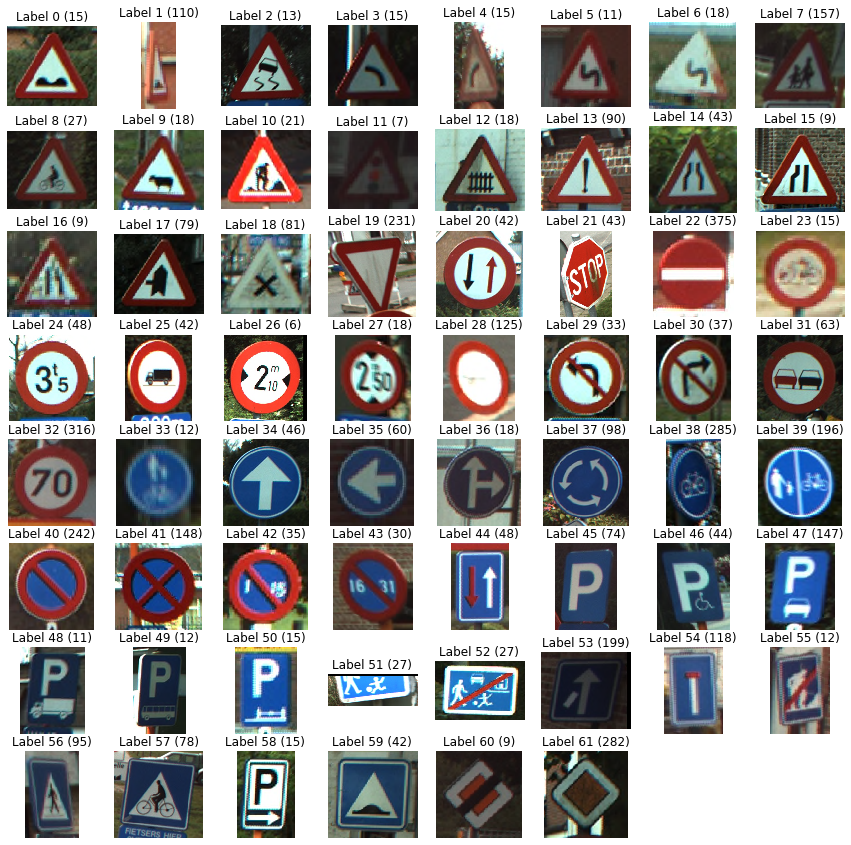

In [0]:
import matplotlib.pyplot as plt
def display_images_and_labels(images, labels):
    #Display the first image of each label.
    unique_labels = set(labels) #Grouping same labels together
    plt.figure(figsize=(15, 15)) #Sets the size of figure which will contain all images displayed to 15x15 inches
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns in the 15x15 inch plot figure created above
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image,cmap="gray")
    plt.show()
display_images_and_labels(training_images, training_labels)

We now move towards converting our images into similar size. This is implemented as all our images had inconsistent size initially and working on  different sized image data set would be almost detrimental to the CNN network that we created.



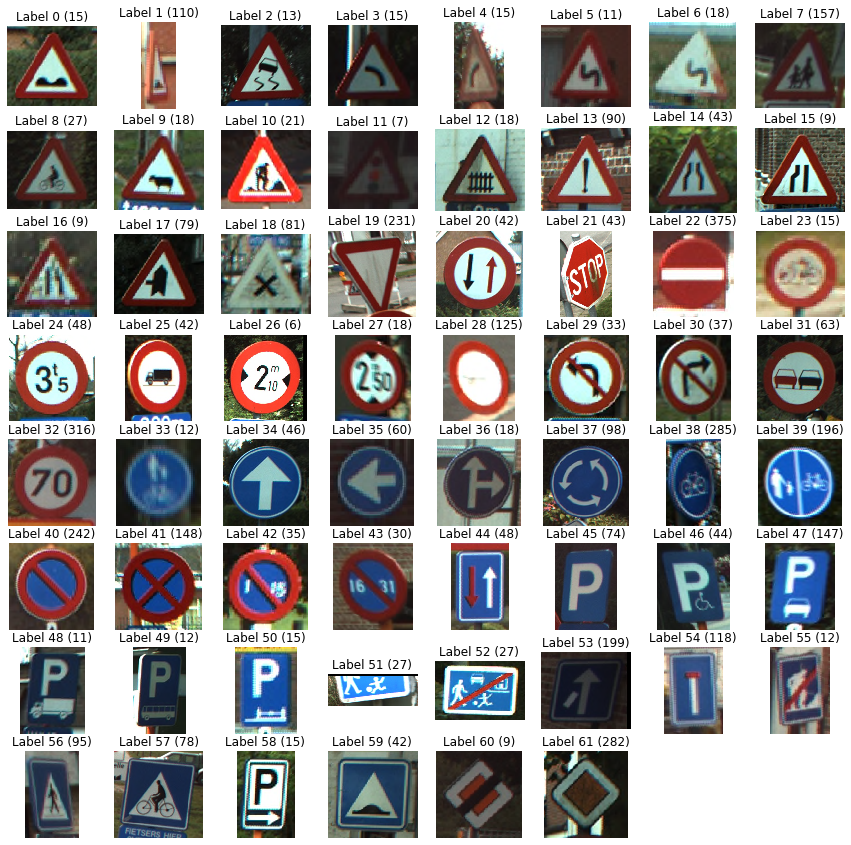

In [0]:
import numpy as np
#Training Data
#Reshaping the images to 32x32 px
reshape_images_training=[]
for i in training_images:
  reshape_images_training.append(skimage.transform.resize(i,(32,32), mode ='constant'))
reshape_images_training= np.array(reshape_images_training) #Keras requires our images and labels to be in numpy arrays
#reshape_images_training = reshape_images_training.astype('float32')
#print(reshape_images_training.shape)

#Testing Data
reshape_images_testing=[]
for i in testing_images:
  reshape_images_testing.append(skimage.transform.resize(i,(32,32), mode ='constant'))
reshape_images_testing= np.array(reshape_images_testing) 
#reshape_images_testing = reshape_images_testing.astype('float32')
#print(reshape_images_testing.shape)
display_images_and_labels(training_images,training_labels)
#display_images_and_labels(testing_images, testing_labels)

We now convert our 3 channel (RGB) images (32 x 32 x 3) into a single channel grayscale image (32 x 32 x1). We implement gray scaling of the images to see whether it can help us in better isolating and reducing the noise in each of our images immensely. 

In [0]:
from skimage import io
from skimage import color
#Training Data
#Converting RGB reshaped images to grayscale images
grayscale_images_training=[]
for i in reshape_images_training:
  grayscale_images_training.append(color.rgb2gray(i))
grayscale_images_training= np.array(grayscale_images_training)  #Keras requires our images and labels to be in numpy arrays
#grayscale_images_training = reshape_images_training.astype('float32')
#print("Gray: \n")
#print(grayscale_images_training[0].shape)
image_expanded_training = grayscale_images_training[:, :, :, np.newaxis]  #converting images from 32x32 to 32x32x1 
grayscale_images_training=image_expanded_training
#print(grayscale_images_training[0].shape)
#display_images_and_labels(training_images,training_labels)
#display_images_and_labels(testing_images, testing_labels)

"""
print("Grayscale Training images")
print(len(grayscale_images_training))

for i in grayscale_images_training[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped Training Images ")

for i in reshape_images_training[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))
"""
#Testing Data
grayscale_images_testing=[]
for i in reshape_images_testing:
  grayscale_images_testing.append(color.rgb2gray(i))
grayscale_images_testing= np.array(grayscale_images_testing) 
#grayscale_images_testing = reshape_images_testing.astype('float32')
#print("gray")
#print(grayscale_images_testing[0].shape)
image_expanded_testing = grayscale_images_testing[:, :, :, np.newaxis]  
grayscale_images_testing=image_expanded_testing
#print(grayscale_images_testing[0].shape)
#display_images_and_labels(testing_images,testing_labels)
#display_images_and_labels(grayscale_images_testing, testing_labels)
"""
print("Grayscale testing images")
print(len(grayscale_images_testing))
for i in grayscale_images_testing[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

print("Reshaped testing Images ")

for i in reshape_images_testing[:10]:
  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))

"""

'\nprint("Grayscale testing images")\nprint(len(grayscale_images_testing))\nfor i in grayscale_images_testing[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\nprint("Reshaped testing Images ")\n\nfor i in reshape_images_testing[:10]:\n  print("shape: {0}, min: {1}, max: {2}".format(i.shape, i.min(), i.max()))\n\n'